In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from utils import *
from numpy.fft import fft2, ifft2, fftshift
from SALSA import SALSA

In [12]:
img_ref = cv2.cvtColor( cv2.imread("images/cameraman.tif"), cv2.COLOR_BGR2GRAY)
M, N = img_ref.shape[:2]

In [13]:
fraction_missing = 0.75
mask = np.random.rand( img_ref.shape[0],img_ref.shape[1] )>fraction_missing

def A_op(x):
    y = np.multiply(mask, x)
    return y

def AT_op(x):
    y = np.multiply(mask, x)
    return y

In [14]:
SNRdb = 20
y = A_op( addGaussianNoise(img_ref, SNRdb) )

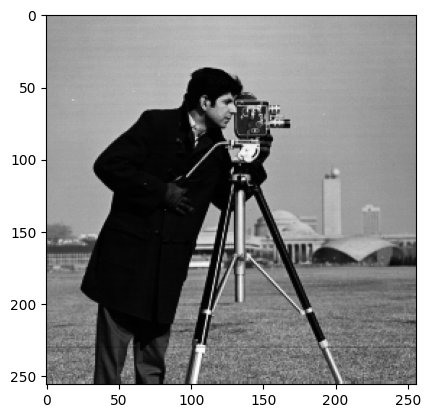

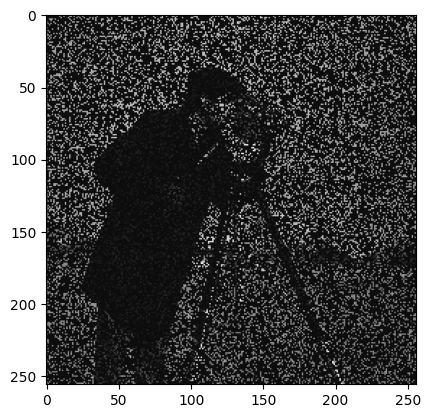

In [15]:
plt.figure(1)
plt.imshow(img_ref, cmap=plt.cm.gray)

plt.figure(2)
plt.imshow(y, cmap=plt.cm.gray)

In [16]:
# parameters
lambda_reg = 0.5 #2.5e-2
mu = 5e-3
outeriters = 500
tol = 1e-4
chambolleit = 20

def Phi(x):
    return TVnorm(x)

def Psi(x,th):
    return denoiseTV(x,th,chambolleit,1e-2,np.array([0]),np.array([0]))

#invATA = mask*(1/(1+mu))+(1-mask)*(1/mu);
def invLS(x, mu):
    return np.multiply( mask*(1/(1+mu))+(1-mask)*(1/mu), x )

In [17]:
salsa_obj = SALSA( y, A=A_op, AT=AT_op, invLS=invLS, tau=1, isTVinitialization=1)

x, objective, times, distance, numA, numAt, mses = salsa_obj.predict(y, tau=lambda_reg,mu = 5e-3,\
                                                                     stopCriterion=1,\
                                                                     x_true=img_ref,\
                                                                     x_init=2,\
                                                                     MaxIt=outeriters,\
                                                                     tolA=1e-4,\
                                                                     verbose=1)

print ("ISNR is ",myISNR(img_ref,y,x))

Initial value of objective function = 2.50e+06
iter= 0, obj= 3.37e-24, stop criterion= 1.00e+00, (target= 1.00e-04), MSE = 13515.48
iter= 1, obj= 2.82e+05, stop criterion= 8.38e+28, (target= 1.00e-04), MSE = 8393.43
iter= 2, obj= 4.19e+05, stop criterion= 4.82e-01, (target= 1.00e-04), MSE = 3453.32
iter= 3, obj= 3.80e+05, stop criterion= 9.28e-02, (target= 1.00e-04), MSE = 947.12
iter= 4, obj= 3.20e+05, stop criterion= 1.57e-01, (target= 1.00e-04), MSE = 624.32
iter= 5, obj= 3.17e+05, stop criterion= 1.09e-02, (target= 1.00e-04), MSE = 1188.75
iter= 6, obj= 3.42e+05, stop criterion= 8.06e-02, (target= 1.00e-04), MSE = 1558.07
iter= 7, obj= 3.45e+05, stop criterion= 7.55e-03, (target= 1.00e-04), MSE = 1414.41
iter= 8, obj= 3.44e+05, stop criterion= 6.40e-04, (target= 1.00e-04), MSE = 981.72
iter= 9, obj= 3.26e+05, stop criterion= 5.28e-02, (target= 1.00e-04), MSE = 585.18
iter= 10, obj= 3.14e+05, stop criterion= 3.63e-02, (target= 1.00e-04), MSE = 390.88
iter= 11, obj= 3.21e+05, stop cr

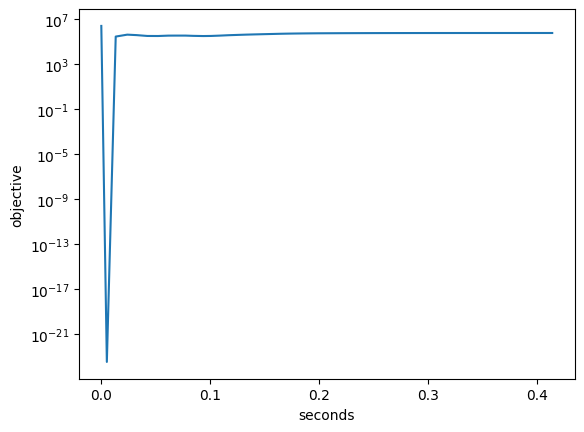

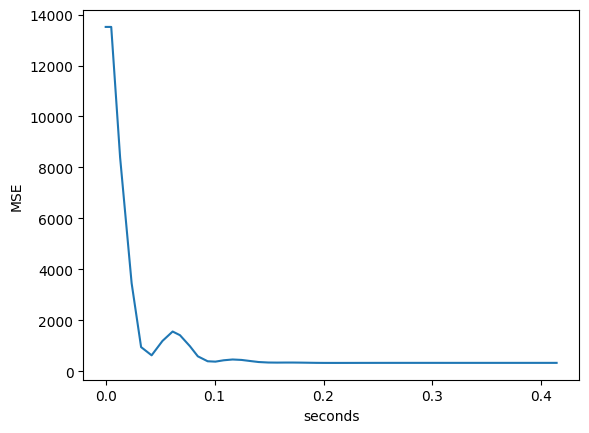

In [18]:
plt.semilogy(times,objective)
plt.xlabel('seconds')
plt.ylabel('objective')
plt.show()

plt.plot(times,mses)
plt.xlabel('seconds')
plt.ylabel('MSE')
plt.show()

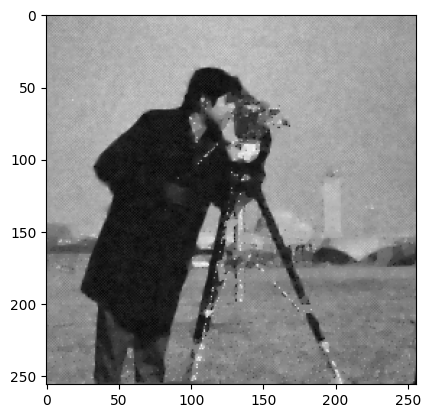

In [19]:
# a estimativa
plt.imshow(x, cmap=plt.cm.gray)
plt.show()